In [1]:
import import_ipynb
import warnings
warnings.filterwarnings('ignore')
from colorit import *
init_colorit()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
 


# Part 1: Data Inspection

In [2]:
coint_prices = pd.read_csv('data.csv',index_col = 'Date')
coint_prices.head(10)

,BABA,FB
Date,,
2016-01-04,76.690002,102.220001
2016-01-05,78.629997,102.730003
2016-01-06,77.330002,102.970001
2016-01-07,72.720001,97.919998
2016-01-08,70.800003,97.330002
2016-01-11,69.919998,97.510002
2016-01-12,72.680000,99.370003
2016-01-13,70.290001,95.440002
2016-01-14,72.250000,98.370003


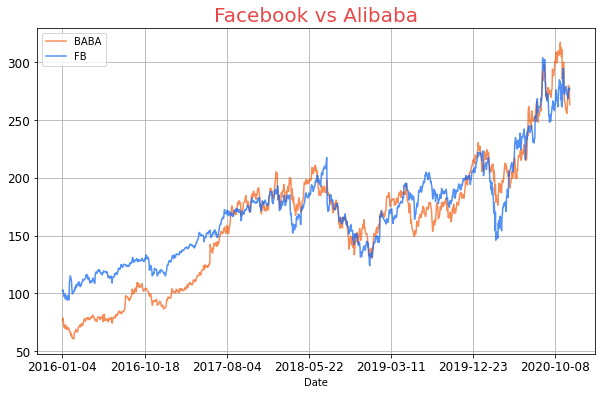

In [3]:
coint_prices.plot(figsize = (10,6), 
                  fontsize = 12,
                 color = ['#F55C10','#0A63F5'],alpha = 0.7)
plt.title('Facebook vs Alibaba',
          fontsize = 20,
         color = '#E64848')
plt.grid(True)

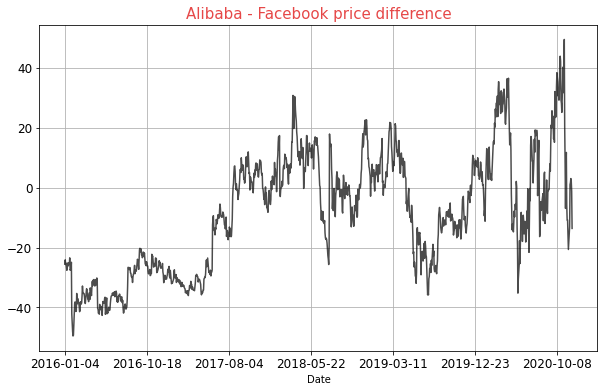

In [4]:
prices_diff = coint_prices.BABA - coint_prices.FB
prices_diff.plot(figsize = (10,6), 
                  fontsize = 12,
                color = 'black',
                alpha = 0.7)
plt.title('Alibaba - Facebook price difference',
          fontsize = 15,
         color = '#E64848')
plt.grid(True)

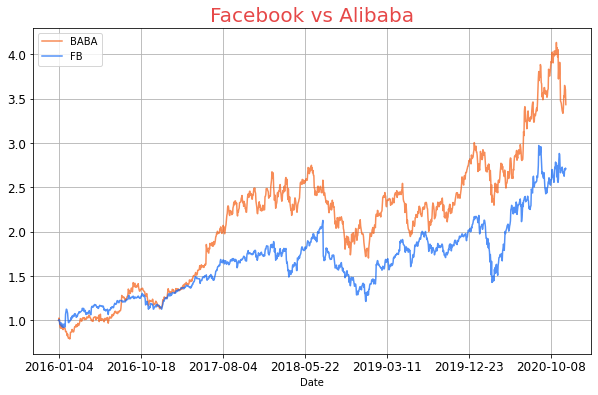

In [5]:
coint_prices = coint_prices/coint_prices.iloc[0]
coint_prices.plot(figsize = (10,6), 
                  fontsize = 12,
                 color = ['#F55C10','#0A63F5'],
                  alpha = 0.7)
plt.title('Facebook vs Alibaba',fontsize = 20,color = '#E64848')
plt.grid(True)

In [6]:
# return

In [7]:
returns = np.log(coint_prices).diff().dropna()
returns.head()

,BABA,FB
Date,,
2016-01-05,0.024982,0.004977
2016-01-06,-0.016671,0.002333
2016-01-07,-0.061466,-0.050287
2016-01-08,-0.026757,-0.006044
2016-01-11,-0.012507,0.001848


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4c4ae8910>,
      dtype=object)

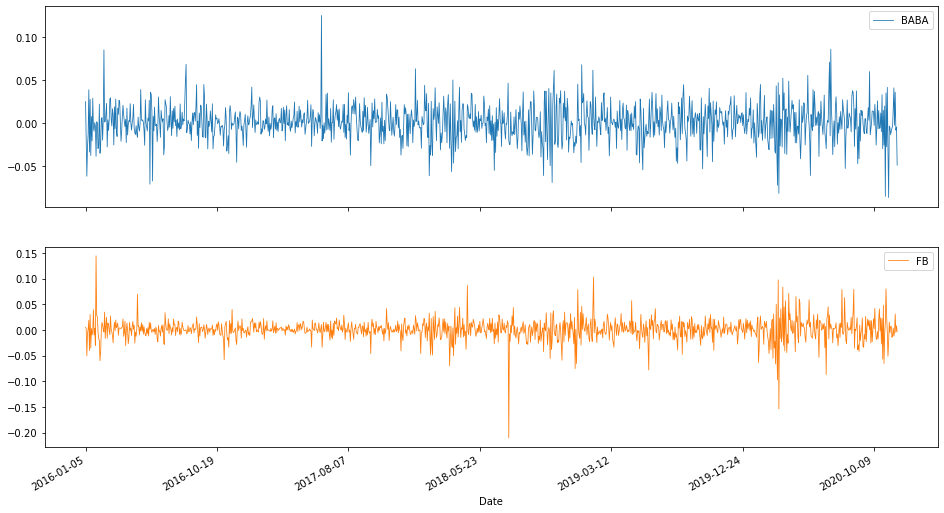

In [8]:
returns.plot(figsize = (16,9),subplots = True, linewidth = 0.8)

In [9]:
returns

,BABA,FB
Date,,
2016-01-05,0.024982,0.004977
2016-01-06,-0.016671,0.002333
2016-01-07,-0.061466,-0.050287
2016-01-08,-0.026757,-0.006044
2016-01-11,-0.012507,0.001848
...,...,...
2020-11-23,-0.002330,-0.004720
2020-11-24,0.035817,0.031139
2020-11-25,-0.008033,-0.004814


In [10]:
from utility import VAR

importing Jupyter notebook from utility.ipynb


In [11]:
model = VAR(returns, lag = 1)
model.report()

Estimate Coefficient           SD of Estimate            \
                              BABA        FB           BABA        FB   
(Lag_1, BABA)             0.026525 -0.030452       0.032299  0.032653   
(Lag_1, FB)              -0.045617 -0.078142       0.031753  0.032102   
constant                  0.001008  0.000901       0.000588  0.000595   

              t-Statistic            
                     BABA        FB  
(Lag_1, BABA)    0.821254 -0.932594  
(Lag_1, FB)     -1.436612 -2.434177  
constant         1.712616  1.515292

In [12]:
model.p_value < 0.05

,BABA,FB
"(Lag_1, BABA)",False,False
"(Lag_1, FB)",False,True
constant,False,False


In [13]:
model.IC(lag = 10,)

,AIC,BIC
Lag,,
1,-15.740571,-15.715718
2,-15.736774,-15.695353
3,-15.738975,-15.680986
4,-15.734060,-15.659503
5,-15.730489,-15.639363
6,-15.731600,-15.623906
7,-15.733265,-15.609002
8,-15.739999,-15.599167
9,-15.737229,-15.579829


In [14]:
model.stability()

Stability status: [o] STABLE


# Part 2: Cointegration

In [15]:
coint_prices = pd.read_csv('data.csv',index_col = 'Date')
FB = pd.DataFrame(coint_prices['FB'])
BABA = pd.DataFrame(coint_prices['BABA'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4c44ae310>,
      dtype=object)

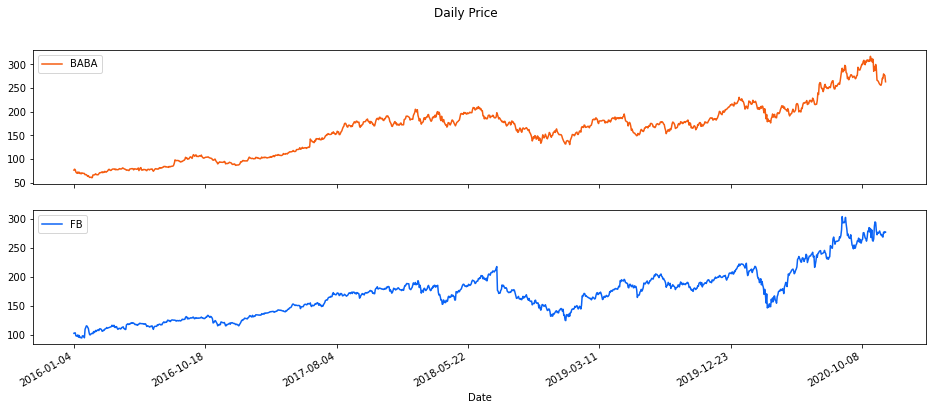

In [16]:
coint_prices.plot( figsize = (16,6),
                  color = ['#F55C10','#0A63F5'],
                  subplots = True,
                 title = 'Daily Price',)

# Engle Granger step 1  FB - BABA

In [17]:
from utility import LinearRegression as LR

In [18]:
model = LR(x = BABA, y = FB) 
model.report()

,Estimate Coefficient,SD of Estimate,t-Statistic
,FB,FB,FB
BABA,0.729003,0.006459,112.858842
constant,52.451564,1.105572,47.442911


In [19]:
#b_coint, constant
model.coef

,FB
BABA,0.729003
constant,52.451564


In [20]:
residuals = pd.DataFrame(model.error.reshape(1,1237)[0],
                         index = BABA.index,
                         columns = ['Residual(FB - β·BABA)'])
residuals.head()

,Residual(FB - β·BABA)
Date,
2016-01-04,-6.138810
2016-01-05,-7.043070
2016-01-06,-5.855372
2016-01-07,-7.544670
2016-01-08,-6.734982


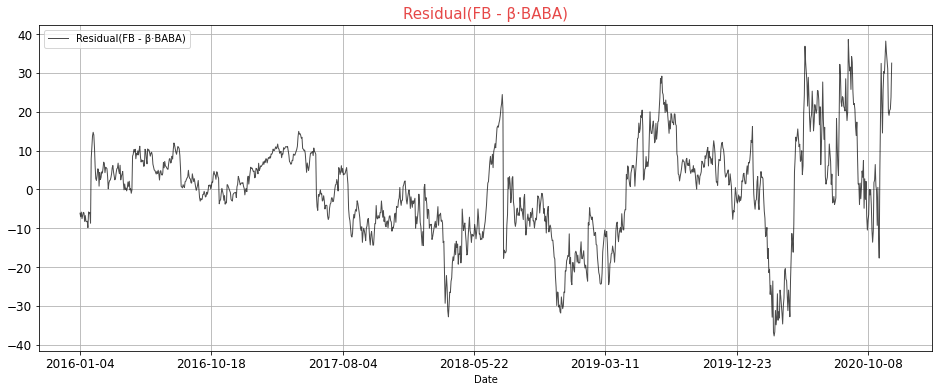

In [21]:
residuals.plot(figsize = (16,6),
              color = 'black',alpha = 0.7,
              fontsize = 12,linewidth = 1)
plt.title('Residual(FB - β·BABA)',
         color = '#E64848',
         fontsize = 15)
plt.grid(True)

In [22]:
from utility import ADF

In [23]:
adf_test = ADF(residuals)
adf_test.report()

The T-value is [-4.6388966] which is lower than -3.45
[*]We reject the  𝐻0  hypothesis of unit root. The residuals are stationary.


,Estimate Coefficient,SD of Estimate,t-Statistic
,(ΔResidual(FB - β·BABA)),(ΔResidual(FB - β·BABA)),(ΔResidual(FB - β·BABA))
"(Lag 1, Residual(FB - β·BABA))",-0.036935,0.007962,-4.638897
"(Lag 1, ΔResidual(FB - β·BABA))",0.015089,0.028612,0.527379
constant,0.030886,0.099154,0.311499


# Engle Granger step 2 FB - BABA


$$ {  ΔPA_{𝑡}=𝜑ΔPB_{𝑡} − (1−𝛼)𝑒ˆ𝑡−1+𝜀_{𝑡} }$$

$$ { ΔFB𝑡 = 𝜑ΔBABA_{𝑡} −(1−𝛼)CointResidual(FB \; on \; BABA_{𝑡−1}) + 𝜀_{t} }$$

In [24]:
Δy = pd.DataFrame(FB).diff().dropna().add_prefix('Δ')
Δx = pd.DataFrame(BABA).diff().dropna().add_prefix('Δ')

X = Δx.join(residuals.shift(1).dropna().add_prefix('(Lag 1, ').add_suffix(')'))

model = LR(X, Δy,add_const = False)
model.report()


,Estimate Coefficient,SD of Estimate,t-Statistic
,ΔFB,ΔFB,ΔFB
ΔBABA,0.492035,0.025909,18.991042
"(Lag 1, Residual(FB - β·BABA))",-0.033257,0.007627,-4.360584


In [25]:
model.p_value < 0.05

,ΔFB
ΔBABA,True
"(Lag 1, Residual(FB - β·BABA))",True


# Engle Granger step 1 BABA - FB

In [26]:
model = LR(x = FB, y = BABA) 
model.report()

,Estimate Coefficient,SD of Estimate,t-Statistic
,BABA,BABA,BABA
FB,1.250488,0.011080,112.858842
constant,-51.280351,1.946421,-26.345970


In [27]:
model.coef

,BABA
FB,1.250488
constant,-51.280351


In [28]:
residuals = pd.DataFrame(model.error.reshape(1,1237)[0],
                         index = BABA.index,
                         columns = ['Residual(BABA - β·FB)'])
residuals.head()

,Residual(BABA - β·FB)
Date,
2016-01-04,0.145456
2016-01-05,1.447699
2016-01-06,-0.152411
2016-01-07,1.552557
2016-01-08,0.370343


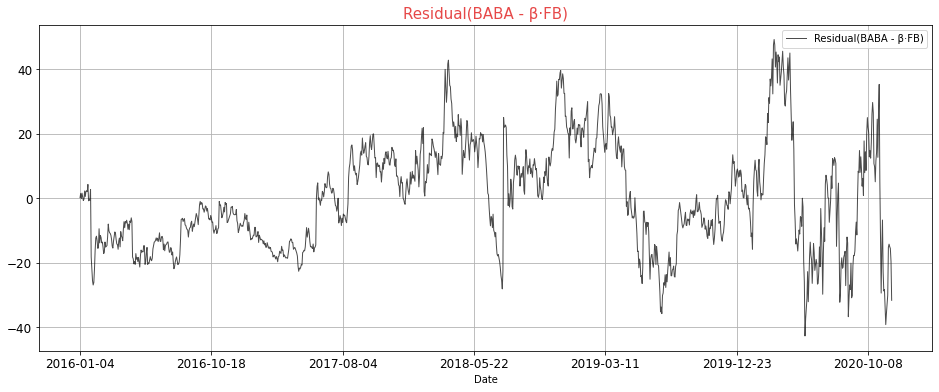

In [29]:
residuals.plot(figsize = (16,6),
              color = 'black',alpha = 0.7,
              fontsize = 12,linewidth = 1)
plt.title('Residual(BABA - β·FB)',
          color = '#E64848',
         fontsize = 15)
plt.grid(True)

In [30]:
adf_test = ADF(residuals)
adf_test.report()

The T-value is [-4.67740912] which is lower than -3.45
[*]We reject the  𝐻0  hypothesis of unit root. The residuals are stationary.


,Estimate Coefficient,SD of Estimate,t-Statistic
,(ΔResidual(BABA - β·FB)),(ΔResidual(BABA - β·FB)),(ΔResidual(BABA - β·FB))
"(Lag 1, Residual(BABA - β·FB))",-0.036240,0.007748,-4.677409
"(Lag 1, ΔResidual(BABA - β·FB))",0.021707,0.028594,0.759141
constant,-0.025572,0.126650,-0.201913


In [31]:
model = VAR(residuals, lag = 1)
model.report()

,Estimate Coefficient,SD of Estimate,t-Statistic
,Residual(BABA - β·FB),Residual(BABA - β·FB),Residual(BABA - β·FB)
"(Lag_1, Residual(BABA - β·FB))",0.964569,0.007667,125.807446
constant,-0.024724,0.126427,-0.195562


In [32]:
B = 0.964569
C = -0.024724
mu = C/(1-B)

In [33]:
mu

-0.6978070051649687

In [34]:
tau = 1/252

In [35]:
SSE = np.sum(model.error**2)
sigma_eq = ((SSE*tau/(1-B**2))**0.5).values[0]
sigma_eq

37.31060585156058

Text(0.5, 1.0, 'Signals (Z = 0.5)')

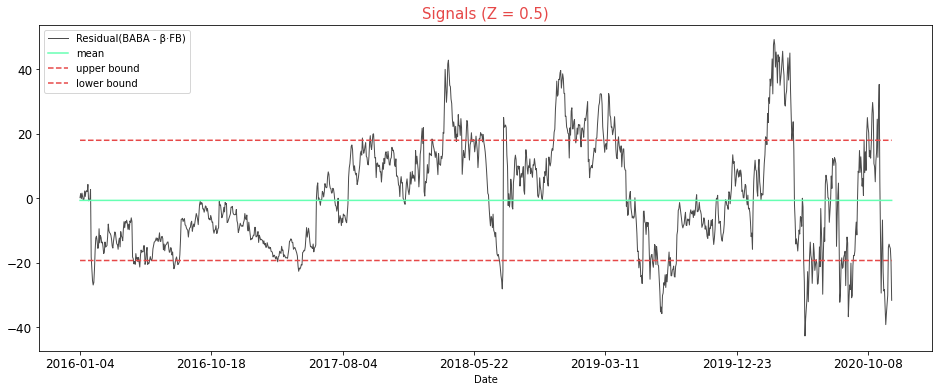

In [36]:
Z = 0.5
residuals.plot(figsize = (16,6),
              color = 'black',alpha = 0.7,
              fontsize = 12,linewidth = 1)
plt.plot(np.ones(len(residuals))*mu,
        color = '#66ffb3', label = 'mean')

plt.plot(np.ones(len(residuals))*(mu+Z*sigma_eq),
         '--', color = '#E64848', label = 'upper bound')
plt.plot(np.ones(len(residuals))*(mu-Z*sigma_eq),
         '--',color = '#E64848', label = 'lower bound')
plt.legend(fontsize = 10)

plt.title('Signals (Z = {})'.format(Z),
          color = '#E64848',
         fontsize = 15)